In [1]:
# to do : fix sort_OSPE_output & use to get final states
# sort ones+twos into finished and unfinished lists
# idea: object oriented programming, you can make a model object!!

In [2]:
import glob
import matplotlib.pyplot as plt
inicon_filenames = glob.glob('Run4/IniCon/triple.in*')
output_filenames = glob.glob('Run4/Output/output_*.txt')

In [29]:
# remove the files that did not finish running (I just got this from hoffman)
for i in range(1,100):
    if i in [6,4,16,17,25,44,70,73,82,89,94,96]: # crashed/unfinished 
        print(i)
        inicon_filenames.remove('Run4/IniCon/triple.in'+str(i))
        output_filenames.remove('Run4/Output/output_'+str(i)+'.txt')

4
6
16
17
25
44
70
73
82
89
94
96


In [3]:
a_subsat = 0.1974;a_subsat_err = 0.2*a_subsat
e_subsat = 0.816;e_subsat_err = 0.2*e_subsat
ai = []; af = []
ei = []; ef = []

In [4]:
# get initial conditions
for inicon_fname in inicon_filenames:
    param_string = open(inicon_fname).readlines()[7]
    params = param_string.split('  ')
    ei_val = float(params[-6])
    ai_val = float(params[-8])
    ai.append(ai_val)
    ei.append(ei_val)

In [5]:
# get final conditions
# put in: Run3/Output/*.txt
from sort_OSPE_output import get_values

Output file directory: Output/*.txt
0 / 0 didn't survive
0 / 0 survived
0 / 0 produced error


In [6]:
for output_fname in output_filenames:
    values = get_values(output_fname)
    af.append(values[1])
    ef.append(values[3])

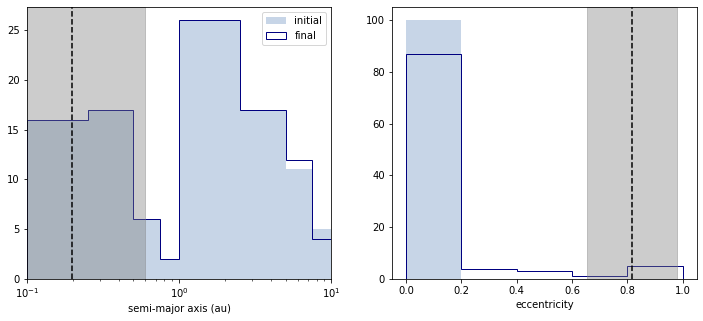

In [7]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
# define bins
ebins = [0,0.2,0.4,0.6,0.8,1]
abins = [0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1,2.5,5,7.5,10]


ax[0].hist(ai,color='lightsteelblue',alpha=0.7,label='initial',bins=abins)
ax[0].hist(af,color='navy',histtype = 'step',label='final',bins=abins)
ax[0].axvline(x=a_subsat, linestyle='--',color='k')
ax[0].axvspan(a_subsat/3.,a_subsat*3,alpha=0.4,color='grey')
ax[0].set_xlabel('semi-major axis (au)')
ax[0].set_xscale('log')
ax[0].set_xlim(0.1,10)
ax[0].legend()

ax[1].hist(ei,alpha=0.7,color='lightsteelblue',bins=ebins)
ax[1].hist(ef,color='navy',histtype='step',bins=ebins)
ax[1].axvline(x=e_subsat,linestyle='--',color='k')
ax[1].set_xlabel('eccentricity')
ax[1].axvspan(e_subsat-e_subsat_err,e_subsat+e_subsat_err,alpha=0.4,color='grey')

Text(0.5, 1.0, 'Final State')

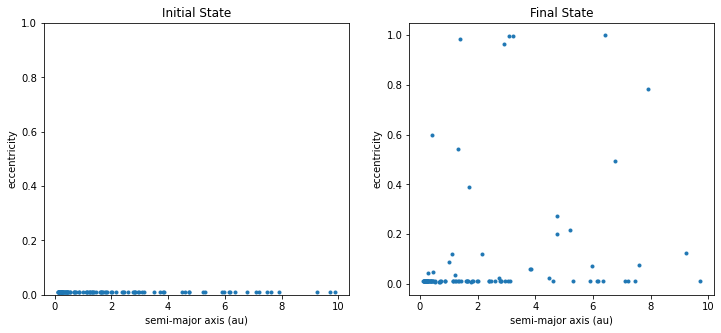

In [8]:
fig,ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(ai,ei,'.');ax[0].set_xlabel('semi-major axis (au)');ax[0].set_ylabel('eccentricity')
ax[0].set_title('Initial State')
ax[0].set_ylim(0,1)

ax[1].plot(af,ef,'.');ax[1].set_xlabel('semi-major axis (au)');ax[1].set_ylabel('eccentricity')
ax[1].set_title('Final State')

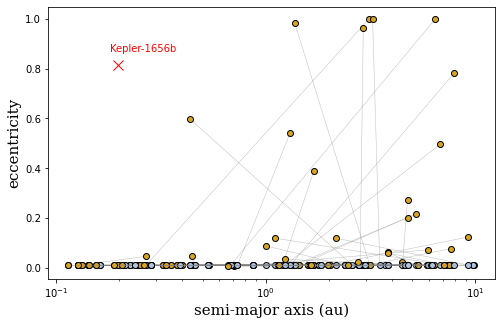

In [9]:
# try to make another ea diagram with a line connecting them
plt.figure(figsize=(8,5))
for i in range(len(ai)):
    a_i = ai[i];e_i = ei[i]
    a_f = af[i];e_f = ef[i]
    a = [ai[i], af[i]]
    e = [ei[i], ef[i]]
    plt.plot(a,e,'-', color='grey',alpha=0.5,linewidth=0.5)
    plt.plot(a_i,e_i,'o',color='lightsteelblue',markeredgecolor='k')
    plt.plot(a_f,e_f,'o',color='goldenrod',markeredgecolor='k')

plt.plot(a_subsat,e_subsat,'x',color='red',markersize=10)
plt.text(0.18,0.87,'Kepler-1656b',color='red')
plt.xlabel('semi-major axis (au)',fontsize=15,family='serif')
plt.ylabel('eccentricity',fontsize=15,family='serif')
plt.xscale('log')

(array([42., 21., 11.,  6.,  4.,  4.,  4.,  5.,  0.,  3.]),
 array([0.11453195, 1.09032246, 2.06611296, 3.04190347, 4.01769398,
        4.99348448, 5.96927499, 6.9450655 , 7.920856  , 8.89664651,
        9.87243702]),
 <a list of 10 Patch objects>)

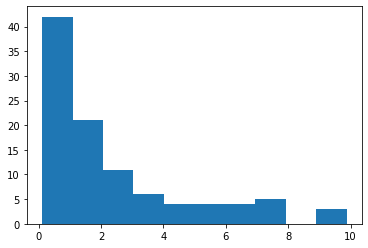

In [10]:
plt.hist(ai)

(array([66.,  6.,  6.,  4.,  6.,  4.,  5.,  1.,  0.,  2.]),
 array([2.06271780e+00, 9.64795264e+02, 1.92752781e+03, 2.89026036e+03,
        3.85299290e+03, 4.81572545e+03, 5.77845799e+03, 6.74119054e+03,
        7.70392308e+03, 8.66665563e+03, 9.62938818e+03]),
 <a list of 10 Patch objects>)

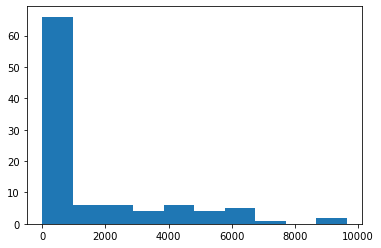

In [11]:
# plot outer sma
a2i = []
# plot epsilon
for inicon_fname in inicon_filenames:
    param_string = open(inicon_fname).readlines()[7]
    params = param_string.split('  ')
    a2i_val = float(params[-7])
    a2i.append(a2i_val)
    
plt.hist(a2i)

In [23]:
epsilon = []
e2 = []
for inicon_fname in inicon_filenames:
    param_string = open(inicon_fname).readlines()[7]
    params = param_string.split('  ')
    e1i_val = float(params[-6])
    e2i_val = float(params[-5])
    a1i_val = float(params[-8])
    a2i_val = float(params[-7])

    epsilon_val = (a1i_val/a2i_val)*(e2i_val/(1-e2i_val**2.))
    epsilon.append(epsilon_val)
    e2.append(e2i_val)

(array([60., 13.,  7.,  2.,  4.,  5.,  2.,  3.,  2.,  2.]),
 array([1.82313037e-06, 8.41293202e-03, 1.68240409e-02, 2.52351498e-02,
        3.36462587e-02, 4.20573676e-02, 5.04684764e-02, 5.88795853e-02,
        6.72906942e-02, 7.57018031e-02, 8.41129120e-02]),
 <a list of 10 Patch objects>)

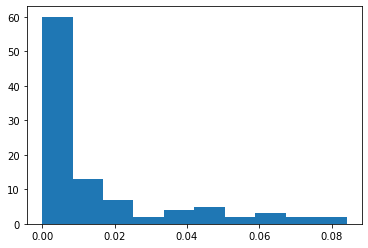

In [13]:
plt.hist(epsilon)

In [17]:
import numpy as np

In [25]:
np.array(epsilon)

array([3.72431932e-04, 1.22204054e-02, 1.18132580e-02, 5.02072526e-02,
       1.66456125e-03, 4.94949816e-03, 2.36643419e-03, 2.34930732e-02,
       4.79080389e-02, 7.10530205e-05, 6.58804947e-02, 8.41129120e-02,
       8.83636433e-05, 4.06532842e-05, 7.62883458e-05, 7.38056590e-02,
       3.48944759e-02, 2.11585932e-02, 5.28921433e-03, 1.44567900e-02,
       1.66200224e-03, 3.80057467e-03, 4.56516476e-03, 3.26689348e-04,
       9.59602944e-04, 6.45700880e-03, 2.35345150e-02, 3.40972793e-03,
       4.27360255e-02, 2.29439472e-02, 6.42575025e-02, 5.53249826e-02,
       5.43779099e-03, 1.50596438e-02, 2.03678665e-03, 5.44605761e-03,
       7.74110203e-06, 1.82313037e-06, 2.42957474e-02, 8.12526177e-04,
       3.18902131e-02, 2.38585705e-04, 5.30115575e-02, 2.05061102e-02,
       4.18419333e-05, 3.35339979e-04, 2.78950236e-04, 9.59197284e-03,
       5.05778729e-03, 4.84346096e-04, 2.07983582e-04, 2.48551176e-04,
       3.08972094e-02, 2.16931516e-04, 1.56592406e-04, 8.86750841e-03,
      